#### **PyTorch Computer Vision**
##### **0.Computer vision libraries in PyTorch**
- `torchvision` - base domain library for PyTorch computer vision.
- `torchvision.datasets` - get datasets and data loading functions for computer vision here.
- `torchvision.models` - get pretrained computer vision models that can leverage for our own problems.
- `torchvision.transforms` - functions for manipulating your vision data(images) to be suitable for use with an ML model.
- `torch.utils.data.Dataset` - Base dataset class for PyTorch.
- `torch.utils.data.DataLoader` - Creates a Python interable over a dataset. 

**Explanation :**  
  
You need to import `torch` (the main toolbox) to use `nn` (a module inside it), as `nn` can't be accessed without the toolbox.

---
You can import `ToTensor` directly from `torchvision.transforms` without importing `transforms` separately, as `torchvision` is the main toolbox containing the `transforms` module with `ToTensor` inside.

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets # datasets and data loading functions
from torchvision import transforms # manipulating with vision data
from torchvision.transforms import ToTensor 

# Import matplotlib for visualization 
import matplotlib.pyplot as plt

# Check versions 
print(torch.__version__)
print(torchvision.__version__)


2.6.0+cpu
0.21.0+cpu


**`ToTensor` Explanation:**   
  
`ToTensor` from `torchvision.transforms` converts a PIL Image or NumPy array into a PyTorch tensor, reformatting it from HWC to CHW and scaling pixel values from [0, 255] to [0.0, 1.0] for PyTorch model compatibility.

##### **1. Getting a dataset:**


In [2]:
# Setup training data 
from torchvision import datasets 
from torchvision.transforms import ToTensor 

train_data = datasets.FashionMNIST(
    root = 'data', # where to download data?(directory)
    train = True, # do we want the training dataset?
    download = True, # do we want to download or not?
    transform = ToTensor(), # how do we want to transform the data
    target_transform = None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False, # we want the test dataset, train dataset should be False
    download = True,
    transform=ToTensor(),
    target_transform= None
)

***Explanation:***  
  
**`ToTensor()`: Converts input images to PyTorch tensors.**

**`target_transform=None`: Leaves the labels unchanged; no processing is applied to them.**

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
train_data.dim() # train_data is a object not a tensor
# this is why you are getting an error 

AttributeError: 'FashionMNIST' object has no attribute 'dim'

In [ ]:
# See the first training example
image, labels = train_data[0] # return the tensor of first image of train_data 
image, labels 

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes 
class_names 

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
type(class_names)

list

In [ ]:
class_to_idx = train_data.class_to_idx 
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
len(train_data.classes)

10

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

##### **1.1 Check input & output shapes of data:**

In [ ]:
print(f'Image shape: {image.shape} -> [color_channels, height, width]')
# [height, width, color_channels] to [color_channels, height, width]
print(f'Image label: {class_names[labels]}')

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


##### **1.2 Visualizing our data:**

Image shape: torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

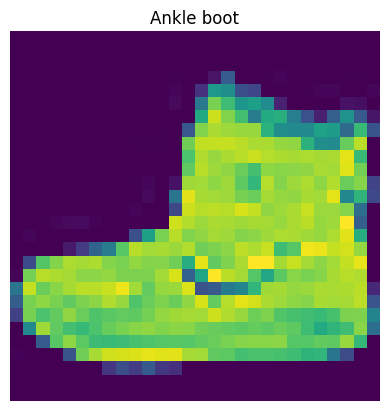

In [12]:
import matplotlib.pyplot as plt 
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze()) # imshow takes only 2D array 
plt.title(class_names[label])
plt.axis(False)

Text(0.5, 1.0, 'Ankle boot')

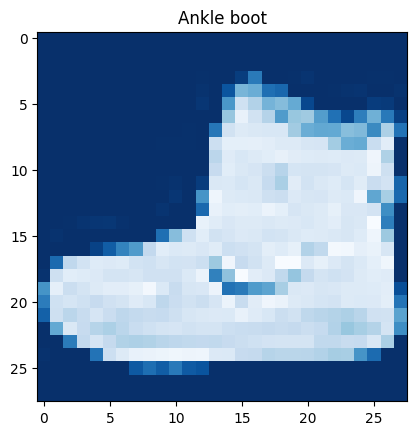

In [ ]:
plt.imshow(image.squeeze(), cmap='Blues_r')
plt.title(class_names[label])

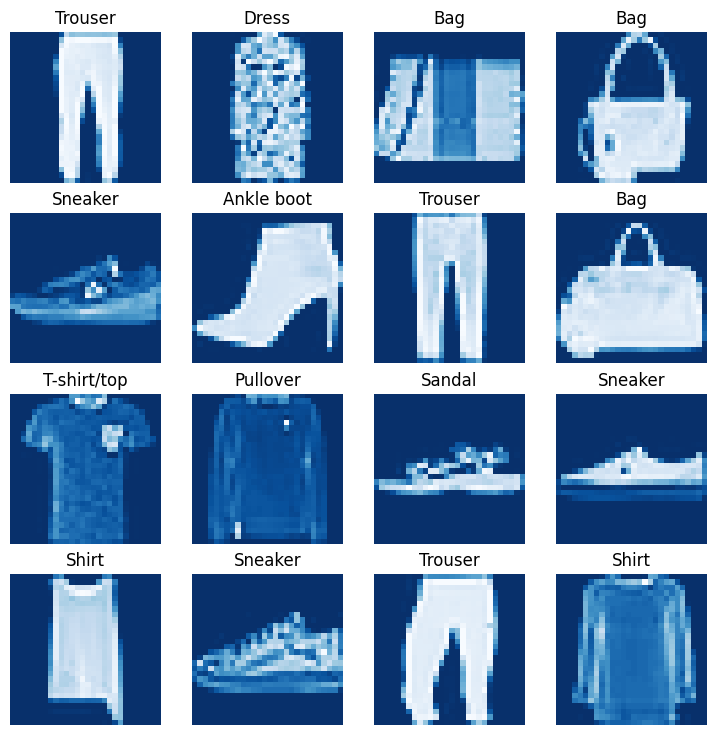

In [8]:
import matplotlib.pyplot as plt 
class_names = train_data.classes
# plot more images
fig = plt.figure(figsize = (9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='Blues_r')
    plt.title(class_names[label])
    plt.axis(False)

***Explanation of this code:***
  
- `fig = plt.figure(figsize=(9, 9))`: Creates a 9x9 inch figure for plotting.
- `rows, cols = 4, 4`: Defines a 4x4 grid for subplots.
- `for i in range(1, rows * cols + 1)`: Loops 16 times to fill the grid.
- `random_idx = torch.randint(0, len(train_data), size=[1]).item()`: Picks a random index from the FashionMNIST dataset.
- `img, label = train_data[random_idx]`: Gets a random image (tensor) and its label.
- `fig.add_subplot(rows, cols, i)`: Selects the i-th subplot in the 4x4 grid.
- `plt.imshow(img.squeeze(), cmap='Blues_r')`: Displays the image (squeezed to 2D) in a blue colormap.
- `plt.title(class_names[label])`: Sets the title to the image’s class (e.g., "T-shirt").
- `plt.axis(False)`: Hides axes for a cleaner look.

**Result**: A 4x4 grid of 16 random FashionMNIST images with their class names as titles, displayed in a blue color scheme.

In [14]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

---
##### **2.Prepare DataLoader:**
  
A **DataLoader** in PyTorch is a utility that efficiently loads and batches data from a dataset (like FashionMNIST), handling shuffling, batching, and parallel data loading for training or testing models.

  
**Batches** are small subsets of a dataset (e.g., 32 images from FashionMNIST) processed together during model training or testing, making computations faster and memory-efficient.